In [2]:
import pandas as pd

In [6]:
gdp = pd.read_csv(r'..\data\경기국면\경기종합지수_통합.csv', encoding='utf-8')

In [ ]:
gdp[['날짜','GDP_성장률']]
gdp

,날짜,GDP_성장률
0,2015-01-01,2.7
1,2015-02-01,2.7
2,2015-03-01,2.7
3,2015-04-01,1.9
4,2015-05-01,1.9
...,...,...
115,2024-08-01,1.5
116,2024-09-01,1.5
117,2024-10-01,1.2
118,2024-11-01,1.2


In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter

# 1) 데이터 불러오기 및 컬럼명 공백 제거
df = pd.read_csv('../data/경기국면/경기종합지수_통합.csv', parse_dates=['날짜'], encoding='utf-8-sig')
df.columns = df.columns.str.strip()

# 2) 동행지수에서 HP 필터로 순환(cycle) 성분만 분리
#    월별 데이터 λ≈129600 (연간 주기 가정)
cycle, trend = hpfilter(df['동행종합지수(2020=100)'], lamb=129600)
df['cycle'] = cycle

# 3) GDP_성장률 컬럼을 그대로 사용
#    cycle > 0 이고 GDP_성장률 > 0 이면 확장, 아니면 수축
df['state'] = np.where(
    (df['cycle'] > 0) & (df['GDP_성장률'] > 0),
    1,
    0
)

# 4) 결과 확인
df[['날짜', '동행종합지수(2020=100)', 'cycle', 'GDP_성장률', 'state']]


,날짜,동행종합지수(2020=100),cycle,GDP_성장률,state
0,2015-01-01,87.2,-0.829289,2.7,0
1,2015-02-01,87.8,-0.462373,2.7,0
2,2015-03-01,87.8,-0.695451,2.7,0
3,2015-04-01,88.0,-0.728513,1.9,0
4,2015-05-01,87.8,-1.161543,1.9,0
...,...,...,...,...,...
115,2024-08-01,111.9,-1.027721,1.5,0
116,2024-09-01,112.1,-1.042020,1.5,0
117,2024-10-01,112.6,-0.756260,1.2,0
118,2024-11-01,112.3,-1.270470,1.2,0


In [21]:
df['state'].value_counts()

state
1    69
0    51
Name: count, dtype: int64

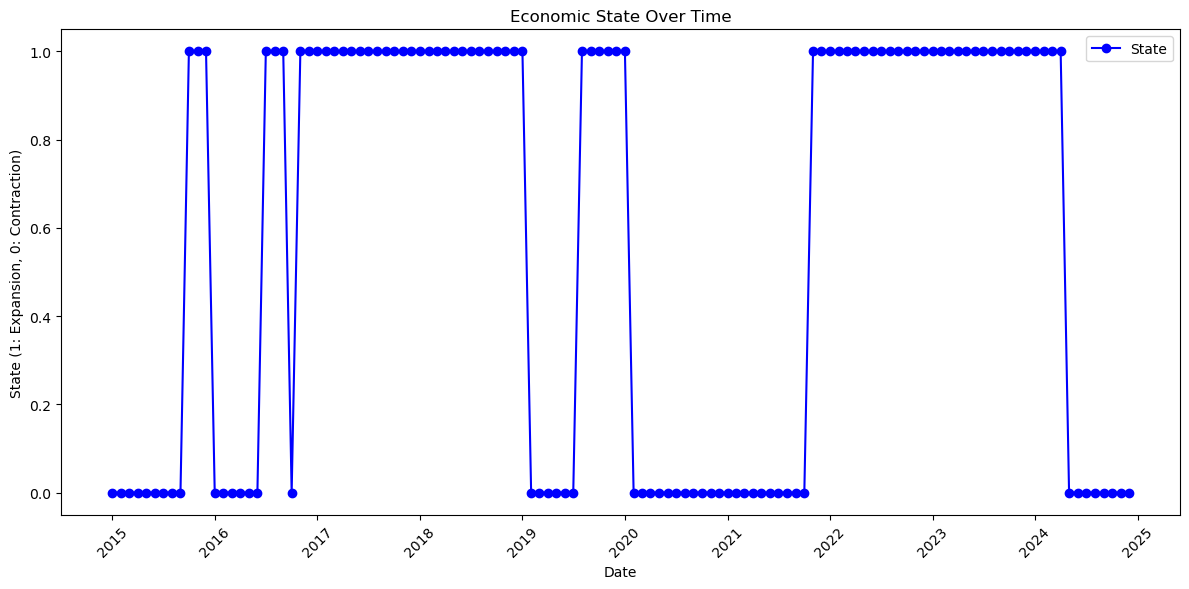

In [22]:
# state 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['날짜'], df['state'], marker='o', linestyle='-', color='blue', label='State')
plt.title('Economic State Over Time')
plt.xlabel('Date')
plt.ylabel('State (1: Expansion, 0: Contraction)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

In [12]:
kospi = pd.read_csv(r'..\data\코스피 200 과거 데이터.csv', encoding='utf-8')

In [13]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2459 non-null   object 
 1   종가      2459 non-null   float64
 2   시가      2459 non-null   float64
 3   고가      2459 non-null   float64
 4   저가      2459 non-null   float64
 5   거래량     2459 non-null   object 
 6   변동 %    2459 non-null   object 
dtypes: float64(4), object(3)
memory usage: 134.6+ KB


In [14]:
# 변동 % 컬럼 끝에 %글자 제거 후 float로 변환
kospi['변동 %'] = kospi['변동 %'].str.replace('%', '').astype(float)

In [15]:
kospi

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2015- 01- 02,244.79,243.96,245.32,243.25,54.15K,0.30
1,2015- 01- 05,244.26,243.83,244.56,241.76,62.85K,-0.22
2,2015- 01- 06,239.93,241.36,242.06,239.32,66.25K,-1.77
3,2015- 01- 07,240.53,239.41,240.91,239.09,54.60K,0.25
4,2015- 01- 08,243.94,242.28,244.13,241.68,64.02K,1.42
...,...,...,...,...,...,...,...
2454,2024- 12- 23,322.98,321.00,324.00,319.77,100.61M,1.46
2455,2024- 12- 24,323.39,324.11,324.50,321.86,78.51M,0.13
2456,2024- 12- 26,321.45,324.48,324.48,321.42,92.61M,-0.60
2457,2024- 12- 27,319.03,320.24,321.30,316.91,86.74M,-0.75


In [16]:
# 날짜 컬럼 문자열을 datetime으로 변환
kospi['날짜'] = pd.to_datetime(kospi['날짜'], format='%Y- %m- %d')

In [17]:
kospi['날짜'].dt.strftime('%Y-%m-%d')

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
2454    2024-12-23
2455    2024-12-24
2456    2024-12-26
2457    2024-12-27
2458    2024-12-30
Name: 날짜, Length: 2459, dtype: object

In [18]:
# 거래량 컬럼 문자열을 정수로 변환 (K: 천, M: 백만)
def parse_volume(x):
	if isinstance(x, str):
		if x.endswith('K'):
			return float(x.replace('K', '')) * 1000
		elif x.endswith('M'):
			return float(x.replace('M', '')) * 1000000
		else:
			return float(x)
	return x

kospi['거래량'] = kospi['거래량'].apply(parse_volume)

In [19]:
kospi

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2015-01-02,244.79,243.96,245.32,243.25,54150.0,0.30
1,2015-01-05,244.26,243.83,244.56,241.76,62850.0,-0.22
2,2015-01-06,239.93,241.36,242.06,239.32,66250.0,-1.77
3,2015-01-07,240.53,239.41,240.91,239.09,54600.0,0.25
4,2015-01-08,243.94,242.28,244.13,241.68,64020.0,1.42
...,...,...,...,...,...,...,...
2454,2024-12-23,322.98,321.00,324.00,319.77,100610000.0,1.46
2455,2024-12-24,323.39,324.11,324.50,321.86,78510000.0,0.13
2456,2024-12-26,321.45,324.48,324.48,321.42,92610000.0,-0.60
2457,2024-12-27,319.03,320.24,321.30,316.91,86740000.0,-0.75


In [23]:
# ───────────────────── 0. 패키지 설치/임포트 ─────────────────────
%pip install --upgrade numpy pandas matplotlib statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# ───────────────────── 1. 데이터 준비 ─────────────────────
# ① 날짜 컬럼 → datetime, 인덱스 지정
kospi = kospi.set_index("날짜").sort_index()

# ② 월말 종가로 리샘플 & 로그수익률 생성
close = kospi["종가"].resample("M").last()
y = np.log(close).diff().dropna()      # 월별 로그수익률

# ───────────────────── 2. Markov-Switching(2 국면) 추정 ─────────────────────
mod = MarkovRegression(
    endog=y,
    k_regimes=2,              # 2-state: Expansion vs Contraction
    trend="c",                # 각 국면별 상수항
    switching_variance=True   # 분산까지 국면별
)
res = mod.fit(method="lbfgs", maxiter=500, disp=False)
print(res.summary())

# ───────────────────── 3. 국면(label) 판정 ─────────────────────
# smoothed probabilities: 국면-1(인덱스 1)의 확률
prob_state1 = res.smoothed_marginal_probabilities[1]

# 평균이 더 큰 국면을 ⇒ Expansion 로 명명
regime_means = res.params[:2]          # 각 국면 상수항
expansion_regime = regime_means.argmax()
labels = (prob_state1 > 0.5).astype(int)            # 0/1
labels = labels.replace(
            {expansion_regime: "Expansion",
             1-expansion_regime: "Contraction"}
         )

# ───────────────────── 4. 시각화 ─────────────────────
fig, ax = plt.subplots(figsize=(11,4))
# ① 코스피 레벨선
ax.plot(close.index, close, color="black", label="KOSPI (월말 종가)")
ax.set_yscale("log")

# ② 국면 색칠
for phase, color in [("Expansion","tab:red"), ("Contraction","tab:blue")]:
    mask = labels == phase
    if mask.any():
        ax.fill_between(
            close.index, close.min()*0.9, close.max()*1.1,
            where=mask.reindex(close.index, fill_value=False),
            color=color, alpha=0.15, label=phase
        )

ax.set_title("KOSPI Regimes by 2-state Markov-Switching", fontsize=13)
ax.legend()
plt.tight_layout()
plt.show()

# ───────────────────── 5. 결과 요약 테이블 ─────────────────────
summary = pd.DataFrame({
    "Start": labels.ne(labels.shift()).cumsum().groupby(labels).apply(lambda x: y.index[x.index[0]]),
    "End": labels.ne(labels.shift().shift(-1)).cumsum().groupby(labels).apply(lambda x: y.index[x.index[-1]]),
    "Duration (months)": labels.groupby(labels).size().values,
    "Mean return": y.groupby(labels).mean().values * 100
})
print("\n◼︎ Regime summary (2015-now)")
display(summary)

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.3 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<fr

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import